# TASK 2 :- Exploratory Data Analysis - Titanic Dataset

## Problem Statement

### Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.
### Sample Dataset :- https://www.kaggle.com/c/titanic/data



<img src = "image1.jpg" style="width:1100px;height:350px">

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
titanic = pd.read_csv("train.csv")

In [52]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data Cleaning

In [53]:
# Let's start by checking the missing values in the dataset
print(titanic.isnull().sum())

# Fill missing values for 'Age' with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns that won't contribute to the analysis
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\deepa\AppData\Local\Temp\ipykernel_12788\1814800914.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
C:\Users\deepa\AppData\Local\Temp\ipykernel_12788\1814800914.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

## Exploratory Data Analysis (EDA)
### Exploring the relationships between variables and identify patterns and trends in the data

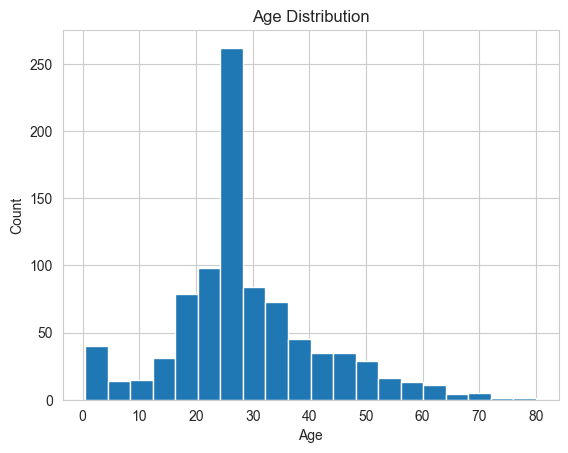

In [54]:
# Exploring the age distribution of passengers
plt.hist(titanic['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

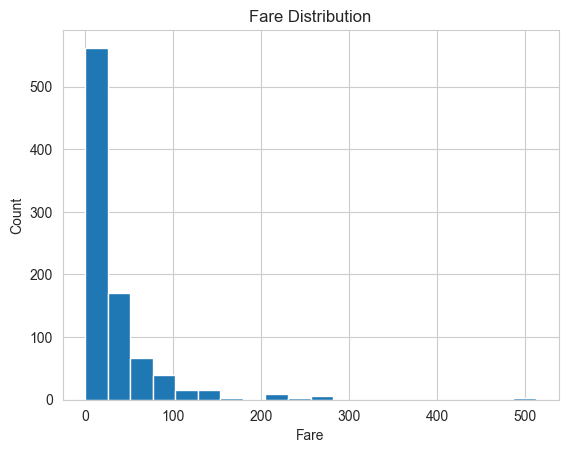

In [55]:
# Explorinng the fare distribution of passengers
plt.hist(titanic['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

In [56]:
# Exploring the relationship between 'Sex' and 'Survived'
sex_survived = titanic.groupby('Sex')['Survived'].mean()*100
print(f"Survival Rate by Sex:\n{sex_survived}")

Survival Rate by Sex:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


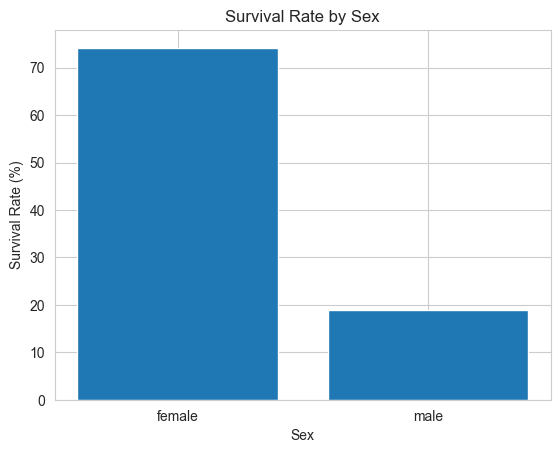

In [57]:
# Visualizing the relationship between 'Sex' and 'Survived'
plt.bar(sex_survived.index, sex_survived.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Sex')
plt.show()

In [58]:
# Exploring the relationship between 'Pclass' and 'Survived'
pclass_survived = titanic.groupby('Pclass')['Survived'].mean() * 100
print(f"Survival Rate by Pclass:\n{pclass_survived}")

Survival Rate by Pclass:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


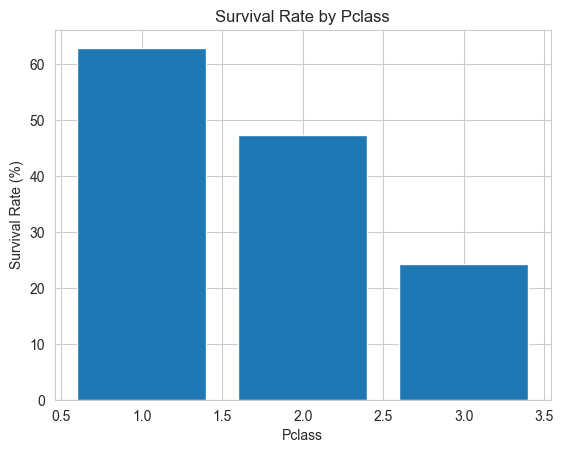

In [59]:
# Visualizing the relationship between 'Pclass' and 'Survived'
plt.bar(pclass_survived.index, pclass_survived.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Pclass')
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_12788\1483002095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=titanic,palette='Greens')


<Axes: xlabel='Survived', ylabel='count'>

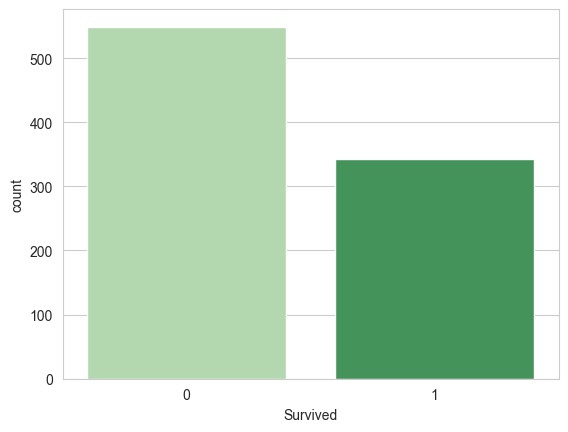

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic,palette='Greens')

<Axes: xlabel='Survived', ylabel='count'>

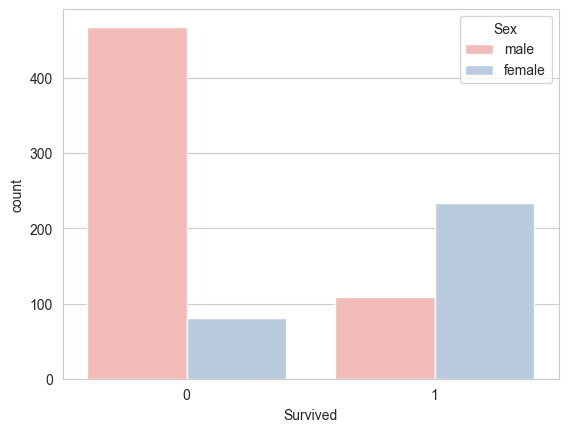

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='Pastel1')

<Axes: xlabel='Survived', ylabel='count'>

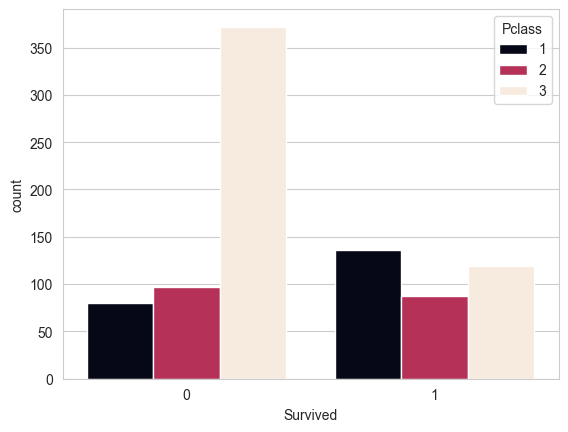

In [62]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rocket')

## Plotting HistPlot

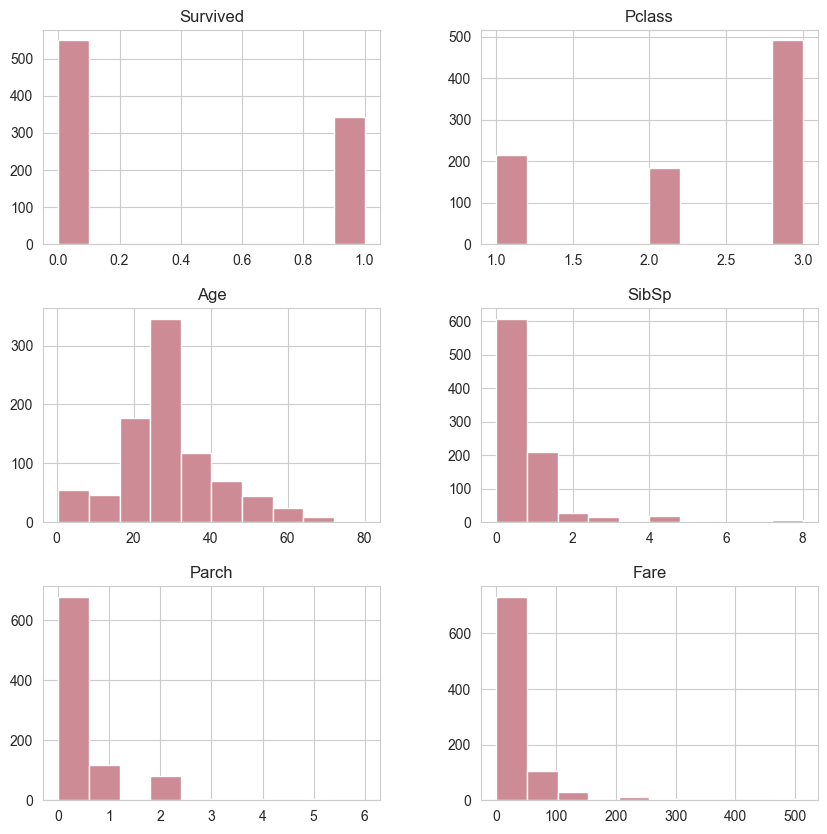

In [63]:
titanic.hist(figsize=(10,10),color='#CD8C95')
plt.show()

## Plotting Pairplot

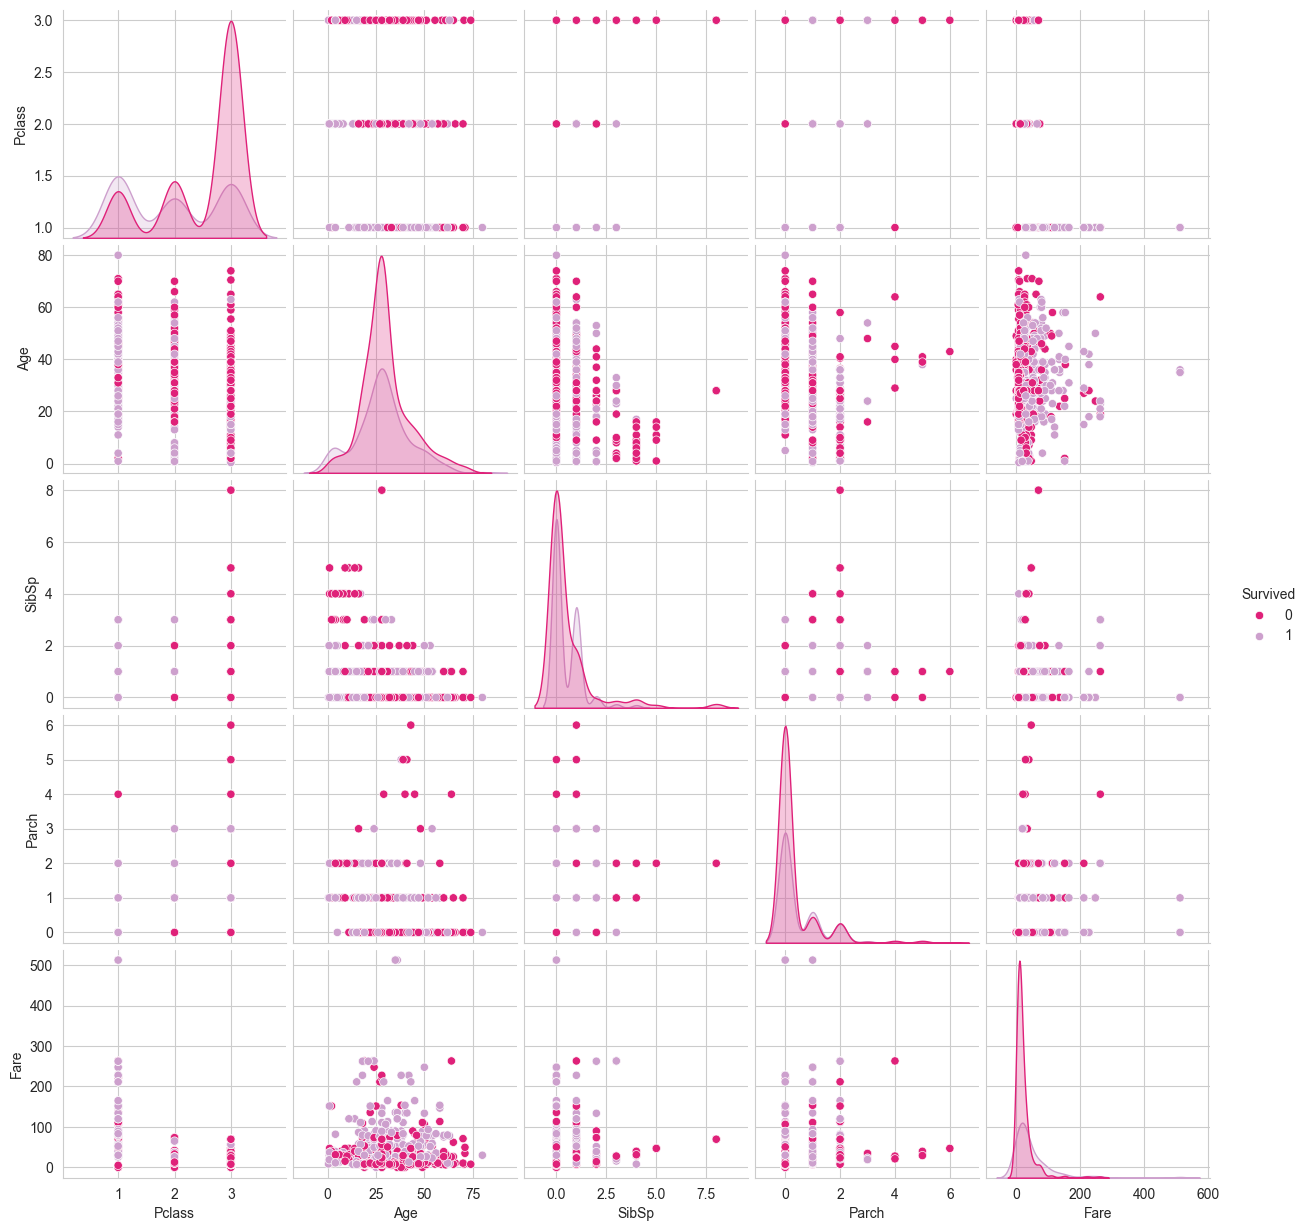

In [69]:
sns.pairplot(titanic,hue='Survived',palette='PuRd_r')
plt.show()

## Plotting Correlation Plot

In [ ]:
sns.heatmap(titanic.corr(),annot=True,cmap='PuBu')
plt.title('Correlation Plot')
plt.show()

<img src = "image2.png" style="width:400px;height:250px">

## Conclusion
The sinking of the Titanic is an undoubtedly tragic and historically significant event. The dataset provided encompasses a range of features pertaining to the passengers who were aboard the Titanic. These features include PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked. Through analyzing these features, we are able to ascertain the survival rate of the passengers, the influence of Pclass and embarked location on their survival, the distribution of passengers based on age and fare, the survival rate based on gender, and the impact of having siblings, spouses, parents, and children on the passengers' chances of survival, among other insights.

This dataset serves as an excellent resource for conducting Exploratory Data Analysis.